In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [8]:
home_rates_csv_path = Path("Reasources/rates_data.csv")
median_sales_prices_csv_path = Path('Reasources/MedianSalesPrices.csv')

In [9]:
mortgage_rate_data = pd.read_csv(home_rates_csv_path)
median_sales_price_data = pd.read_csv(median_sales_prices_csv_path)
mortgage_rate_data.head()

,date,pmms30,pmms30p,pmms15,pmms15p,pmms51,pmms51p,pmms51m,pmms51spread
0,4/2/1971,7.33,,NaN,NaN,NaN,NaN,NaN,NaN
1,4/9/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
2,4/16/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,4/23/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,4/30/1971,7.29,,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mortgage_rate_data = mortgage_rate_data.rename(columns = {"date":"Date", "pmms30": "30-year Loan Rate"})
mortgage_rate_data.head()

,Date,30-year Loan Rate,pmms30p,pmms15,pmms15p,pmms51,pmms51p,pmms51m,pmms51spread
0,4/2/1971,7.33,,NaN,NaN,NaN,NaN,NaN,NaN
1,4/9/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
2,4/16/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,4/23/1971,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,4/30/1971,7.29,,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mortgage_rate_data.drop(["pmms30p", "pmms15", 'pmms15p', 'pmms51', 'pmms51p', 'pmms51m', 'pmms51spread'], axis=1, inplace=True)
mortgage_rate_data

,Date,30-year Loan Rate
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29
...,...,...
2792,10/3/2024,6.12
2793,10/10/2024,6.32
2794,10/17/2024,6.44
2795,10/24/2024,6.54


In [12]:
#mortgage_rate_data.min()

In [13]:
#mortgage_rate_data.max()

In [14]:
mortgage_rate_data['Date'] = pd.to_datetime(mortgage_rate_data['Date'])
mortgage_rate_data['year'] =mortgage_rate_data['Date'].dt.year

average_rates_per_year = mortgage_rate_data.groupby('year')['30-year Loan Rate'].mean().reset_index()
average_rates_per_year

,year,30-year Loan Rate
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115
5,1976,8.865849
6,1977,8.845192
7,1978,9.641731
8,1979,11.203654
9,1980,13.742115


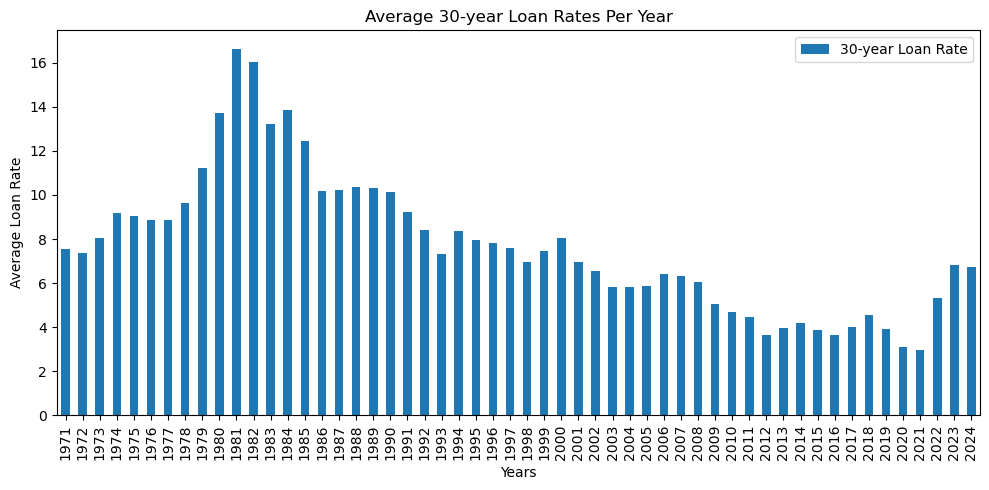

In [15]:
average_rates_per_year.plot(x='year', y='30-year Loan Rate', kind='bar', figsize=(10,5))
plt.title("Average 30-year Loan Rates Per Year")
plt.xlabel('Years')
plt.ylabel('Average Loan Rate')
plt.tight_layout()

plt.show()

In [16]:
median_sales_price_data.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [17]:
median_sales_price_data = median_sales_price_data.rename(columns = {"DATE":"Date", "MSPUS": "Median House Prices"})
median_sales_price_data

,Date,Median House Prices
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
242,2023-07-01,435400.0
243,2023-10-01,423200.0
244,2024-01-01,426800.0
245,2024-04-01,414500.0


In [18]:
median_sales_price_data ['Date'] = pd.to_datetime(median_sales_price_data ['Date'])
median_sales_price_data ['year'] = median_sales_price_data ['Date'].dt.year

average_median_sales_price_data = median_sales_price_data.groupby('year')['Median House Prices'].mean().reset_index()
average_median_sales_price_data 

,year,Median House Prices
0,1963,18050.000000
1,1964,18925.000000
2,1965,20125.000000
3,1966,21500.000000
4,1967,22750.000000
...,...,...
57,2020,328150.000000
58,2021,383000.000000
59,2022,432950.000000
60,2023,426525.000000


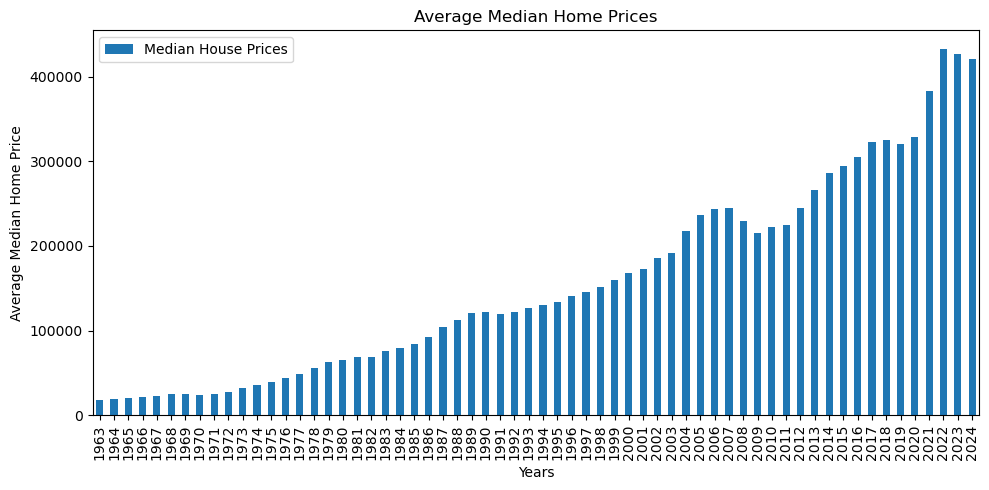

In [30]:
average_median_sales_price_data.plot(x='year', y='Median House Prices', kind='bar', figsize=(10,5))
plt.title("Average Median Home Prices")
plt.xlabel('Years')
plt.ylabel('Average Median Home Price')
plt.tight_layout()

plt.show()

In [26]:
combine_data = pd.merge(average_rates_per_year, average_median_sales_price_data, how='inner', on='year')
#combine_data['Median House Prices'] = combine_data['Median House Prices'].map('${:,.2f}'.format)
#combine_data['30-year Loan Rate'] = combine_data['30-year Loan Rate'].map('{:,.2f}'.format)
combine_data.head()

,year,30-year Loan Rate,Median House Prices
0,1971,7.541750,25225.0
1,1972,7.383269,27525.0
2,1973,8.044808,32600.0
3,1974,9.187115,36050.0
4,1975,9.047115,39275.0


In [27]:
Years = combine_data['year'].values
Loan_rate = combine_data['30-year Loan Rate'].values
House_prices = combine_data['Median House Prices'].values

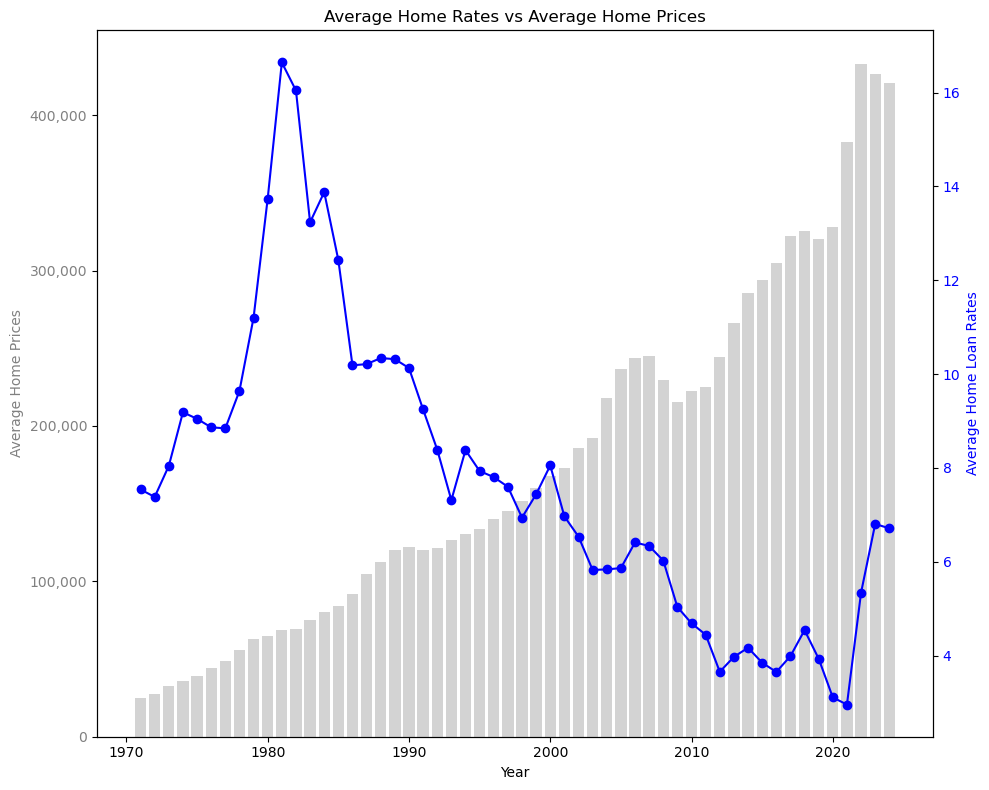

In [29]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(combine_data['year'], combine_data['Median House Prices'], color='lightgray', label='Average Loan Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Home Prices', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(combine_data['year'], combine_data['30-year Loan Rate'], color='blue', marker='o', label='Population Growth')
ax2.set_ylabel('Average Home Loan Rates', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Home Rates vs Average Home Prices')
fig.tight_layout()

plt.show()